# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [5]:
# Cargar todas las librerías

import pandas as pd
import seaborn as sns
import numpy as np

## Cargar datos

In [6]:
# Carga los archivos de datos en diferentes DataFrames

users = pd.read_csv('/datasets/megaline_users.csv', sep=',')
calls = pd.read_csv('/datasets/megaline_calls.csv', sep=',')
messages = pd.read_csv('/datasets/megaline_messages.csv', sep=',')
internet = pd.read_csv('/datasets/megaline_internet.csv', sep=',')
plans = pd.read_csv('/datasets/megaline_plans.csv', sep=',')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [7]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [8]:
# Imprime una muestra de los datos para las tarifas

plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

**En esta tabla podemos inferir el valor por minutos, gigas, mensaje, mensual de los dos planes de la compañia: surt y ultimate**

In [9]:
# To do: tener en cuenta que el pago del internet esta en Gb y el consumo en mb 

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [10]:
plans.duplicated().sum()

0

In [11]:
plans.isnull().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Usuarios/as

In [12]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [13]:
# Imprime una muestra de datos para usuarios

users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

***Se encontró que hay 34 datos de la columna 'churn_date', es decir desiste del plan, esta columna tiene valores nulos ya que indica que el cliente sigue activo o vigente y no ha desistido del servicio, ***

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [14]:
users.duplicated().sum()

0

In [15]:
users.isnull().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [16]:
# Renombrar la columna 'plan' por 'plan_id'

users.rename(columns={'plan':'plan_id'}, inplace=True)
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan_id     500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [17]:
#Se modifica el formato de la columna 'reg_date' a formato fecha y se crea la columna del mes 'month'

users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['reg_month'] = pd.DatetimeIndex(users['reg_date']).month

In [18]:
#Se modifica el formato de la columna 'churn_date' a formato fecha y se crea la columna del mes 'month'

users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['churn_month'] = pd.DatetimeIndex(users['churn_date']).month

In [19]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      500 non-null    int64         
 1   first_name   500 non-null    object        
 2   last_name    500 non-null    object        
 3   age          500 non-null    int64         
 4   city         500 non-null    object        
 5   reg_date     500 non-null    datetime64[ns]
 6   plan_id      500 non-null    object        
 7   churn_date   34 non-null     datetime64[ns]
 8   reg_month    500 non-null    int64         
 9   churn_month  34 non-null     float64       
dtypes: datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 39.2+ KB


In [20]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      500 non-null    int64         
 1   first_name   500 non-null    object        
 2   last_name    500 non-null    object        
 3   age          500 non-null    int64         
 4   city         500 non-null    object        
 5   reg_date     500 non-null    datetime64[ns]
 6   plan_id      500 non-null    object        
 7   churn_date   34 non-null     datetime64[ns]
 8   reg_month    500 non-null    int64         
 9   churn_month  34 non-null     float64       
dtypes: datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 39.2+ KB


## Llamadas

In [21]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [22]:
# Imprime una muestra de datos para las llamadas

calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [23]:
calls.duplicated().sum()

0

In [24]:
calls.isnull().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [25]:
# Renombrar la columna 'id' por 'call_id'
calls.rename(columns={'id':'call_id'}, inplace=True)
calls.head()

,call_id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [26]:
calls.duplicated(subset=['call_id']).sum()

0

In [27]:
calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [28]:
# Se modifica el formato de la columna 'call_date' a formato de fecha:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   call_id    137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [29]:
calls.head()

,call_id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [30]:
#se crea una columna 'month' para analizar mensualmente
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   call_id    137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
 4   month      137735 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.3+ MB


In [31]:
calls.head()

,call_id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12


In [32]:
#redondeo de la duracion de llamadas

import math
def redondeo_calls(duracion):
    redondeo = math.ceil(duracion)
    return redondeo

In [33]:
calls['duracion_redondeada'] = calls['duration'].apply(redondeo_calls)

In [34]:
calls.head()

,call_id,user_id,call_date,duration,month,duracion_redondeada
0,1000_93,1000,2018-12-27,8.52,12,9
1,1000_145,1000,2018-12-27,13.66,12,14
2,1000_247,1000,2018-12-27,14.48,12,15
3,1000_309,1000,2018-12-28,5.76,12,6
4,1000_380,1000,2018-12-30,4.22,12,5


## Mensajes

In [35]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [36]:
# Imprime una muestra de datos para los mensajes

messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [37]:
messages.duplicated().sum()

0

In [38]:
messages.isnull().sum()

id              0
user_id         0
message_date    0
dtype: int64

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [39]:
#Se modifica el formato de la columna 'message_date' a formato fecha y se crea la columna del mes 'month'

messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

In [40]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.3+ MB


In [41]:
messages.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


In [42]:
messages.duplicated(subset=['user_id', 'message_date']).sum()

42808

In [43]:
##Estos duplicados son normales por la naturaleza de la columna, ya que una fila representa solo un mensaje 

In [44]:
##renombrar la columna 'id' por 'message_id'

messages.rename(columns={'id':'messages_id'}, inplace=True)
messages.head()

,messages_id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


## Internet

In [45]:
# Imprime la información general/resumida sobre el DataFrame de internet

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [46]:
# Imprime una muestra de datos para el tráfico de internet

internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [47]:
internet.duplicated().sum()

0

In [48]:
internet.isnull().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [49]:
#Se modifica el formato de la columna 'session_date' a formato fecha
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

In [50]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.0+ MB


In [51]:
internet.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


In [52]:
internet.describe()

,user_id,mb_used,month
count,104825.000000,104825.000000,104825.000000
mean,1242.496361,366.713701,9.342552
std,142.053913,277.170542,2.400404
min,1000.000000,0.000000,1.000000
25%,1122.000000,136.080000,8.000000
50%,1236.000000,343.980000,10.000000
75%,1367.000000,554.610000,11.000000
max,1499.000000,1693.470000,12.000000


In [53]:
#Cual es el porcentaje de mis datos que no usan megas de internet
#filtramos la columna 'mb_used'
len(internet.query('mb_used == 0'))

13747

In [54]:
#Cual es el porcentaje de los uruarios que no usan megas:
(len(internet.query('mb_used == 0'))/len(internet))*100

13.11423801574052

In [55]:
## eso quiero decir que hay una oortunidad de negocio para ese 13% de la los usuarios y así incentivar las ventas 

In [56]:
internet.rename(columns={'id':'internet_id'}, inplace=True)
internet.head()

,internet_id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [57]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [58]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

calls_analytics = calls.pivot_table(index=['user_id', 'month'], values='duracion_redondeada', aggfunc=['sum', 'count'])

In [59]:
calls_analytics

sum               count
              duracion_redondeada duracion_redondeada
user_id month                                        
1000    12                    124                  16
1001    8                     182                  27
        9                     315                  49
        10                    393                  65
        11                    426                  64
...                           ...                 ...
1498    12                    339                  39
1499    9                     346                  41
        10                    385                  53
        11                    308                  45
        12                    496                  65

[2258 rows x 2 columns]

In [60]:
#modificamos los nombres de las columnas

calls_analytics.columns = ['minutos_usados', 'llamadas_hechas']

In [61]:
calls_analytics.head()

minutos_usados  llamadas_hechas
user_id month                                 
1000    12                124               16
1001    8                 182               27
        9                 315               49
        10                393               65
        11                426               64

In [62]:
#modificar los index
calls_analytics =calls_analytics.reset_index()
calls_analytics

,user_id,month,minutos_usados,llamadas_hechas
0,1000,12,124,16
1,1001,8,182,27
2,1001,9,315,49
3,1001,10,393,65
4,1001,11,426,64
...,...,...,...,...
2253,1498,12,339,39
2254,1499,9,346,41
2255,1499,10,385,53
2256,1499,11,308,45


In [63]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

calls_analytics

,user_id,month,minutos_usados,llamadas_hechas
0,1000,12,124,16
1,1001,8,182,27
2,1001,9,315,49
3,1001,10,393,65
4,1001,11,426,64
...,...,...,...,...
2253,1498,12,339,39
2254,1499,9,346,41
2255,1499,10,385,53
2256,1499,11,308,45


In [64]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

mensajes_analytics = messages.pivot_table(index=['user_id', 'month'], values='messages_id', aggfunc='count')

In [65]:
mensajes_analytics.head()

messages_id
user_id month             
1000    12              11
1001    8               30
        9               44
        10              53
        11              36

In [66]:
mensajes_analytics.columns = ['numero_de_mensajes']

In [67]:
mensajes_analytics = mensajes_analytics.reset_index()

In [68]:
mensajes_analytics

,user_id,month,numero_de_mensajes
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [69]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

internet_analytics = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')

In [70]:
internet_analytics.columns =['total_de_datos_usados']

In [71]:
internet_analytics = internet_analytics.reset_index()

In [72]:
internet_analytics

,user_id,month,total_de_datos_usados
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


In [73]:
#se redondea y se convierte los datos a gb:

def dato_redondeo(mb):
    redondeo = math.ceil(mb/1024)
    return redondeo

In [74]:
internet_analytics['total_de_datos_usados_redondeado'] = internet_analytics['total_de_datos_usados'].apply(dato_redondeo)

In [75]:
internet_analytics

,user_id,month,total_de_datos_usados,total_de_datos_usados_redondeado
0,1000,12,1901.47,2
1,1001,8,6919.15,7
2,1001,9,13314.82,14
3,1001,10,22330.49,22
4,1001,11,18504.30,19
...,...,...,...,...
2272,1498,12,23137.69,23
2273,1499,9,12984.76,13
2274,1499,10,19492.43,20
2275,1499,11,16813.83,17


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [76]:
# Fusiona o combina los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
# esto nos permitira realizar un analisis mucho más facil 

calls_and_messages = calls_analytics.merge(mensajes_analytics, on=['user_id', 'month'], how='outer')

In [77]:
calls_and_messages

,user_id,month,minutos_usados,llamadas_hechas,numero_de_mensajes
0,1000,12,124.0,16.0,11.0
1,1001,8,182.0,27.0,30.0
2,1001,9,315.0,49.0,44.0
3,1001,10,393.0,65.0,53.0
4,1001,11,426.0,64.0,36.0
...,...,...,...,...,...
2286,1349,10,NaN,NaN,76.0
2287,1349,11,NaN,NaN,72.0
2288,1349,12,NaN,NaN,61.0
2289,1361,5,NaN,NaN,2.0


In [78]:
tabla_de_consumo = calls_and_messages.merge(internet_analytics, on=['user_id', 'month'], how='outer')
tabla_de_consumo

,user_id,month,minutos_usados,llamadas_hechas,numero_de_mensajes,total_de_datos_usados,total_de_datos_usados_redondeado
0,1000,12,124.0,16.0,11.0,1901.47,2.0
1,1001,8,182.0,27.0,30.0,6919.15,7.0
2,1001,9,315.0,49.0,44.0,13314.82,14.0
3,1001,10,393.0,65.0,53.0,22330.49,22.0
4,1001,11,426.0,64.0,36.0,18504.30,19.0
...,...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,13039.91,13.0
2289,1361,5,NaN,NaN,2.0,1519.69,2.0
2290,1482,10,NaN,NaN,2.0,NaN,NaN
2291,1108,12,NaN,NaN,NaN,233.17,1.0


In [79]:
# Para analizar el comportamiento de las personas por ciudad 

plan_analytics = users[['user_id', 'plan_id', 'city']]

In [80]:
plan_analytics

,user_id,plan_id,city
0,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1002,surf,"Las Vegas-Henderson-Paradise, NV MSA"
3,1003,surf,"Tulsa, OK MSA"
4,1004,surf,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...
495,1495,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA"
496,1496,surf,"New Orleans-Metairie, LA MSA"
497,1497,ultimate,"Los Angeles-Long Beach-Anaheim, CA MSA"
498,1498,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA"


In [81]:
#Ahora vamos a unir la tabla de consumo con la tabla plan= ya que cada mes las suscripciones pueden cambiar 

tabla_de_consumo_planes = tabla_de_consumo.merge(plan_analytics, on=['user_id'], how='outer')

In [82]:
# esta es una Fact Table = tabla de hechos de la empresa 

tabla_de_consumo_planes

,user_id,month,minutos_usados,llamadas_hechas,numero_de_mensajes,total_de_datos_usados,total_de_datos_usados_redondeado,plan_id,city
0,1000,12.0,124.0,16.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8.0,182.0,27.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9.0,315.0,49.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10.0,393.0,65.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11.0,426.0,64.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Boston-Cambridge-Newton, MA-NH MSA"
2299,1319,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Colorado Springs, CO MSA"
2300,1378,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Denver-Aurora-Lakewood, CO MSA"
2301,1463,NaN,NaN,NaN,NaN,NaN,NaN,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"


In [152]:
# consumo promedio por plan 

totales_por_plan = tabla_de_consumo_planes.groupby('plan_id').mean()
totales_por_plan

,user_id,month,minutos_usados,llamadas_hechas,numero_de_mensajes,total_de_datos_usados,total_de_datos_usados_redondeado,minutos_cobrables,mensajes_cobrables,datos_cobrables,rentabilidad_mensual
plan_id,,,,,,,,,,,
surf,1242.940469,9.182454,436.519741,60.895793,40.109656,16717.702137,16.831194,61.225459,6.986067,3.850538,60.551729
ultimate,1253.356354,9.151389,434.676017,61.221599,46.296233,17238.642253,17.331015,0.000000,0.000000,0.328729,72.301105


In [83]:
# Añade la información de la tarifa

surf_monthly_charge = 20
surf_monthly_minutes = 500
surf_monthly_messages = 50
surf_monthly_data = 15
surf_call_charge = 0.03
surf_message_charge = 0.03
surf_data_charge = 10

ultimate_monthly_charge = 70
ultimate_monthly_minutes = 3000
ultimate_monthly_messages = 1000
ultimate_monthly_data = 30 
ultimate_call_charge = 0.01
ultimate_message_charge = 0.01
ultimate_data_charge = 7 

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [84]:
# Calcula el ingreso mensual para cada usuario

def llamadas_por_cobrar(fila):
    plan = fila['plan_id']
    minutos_usados = fila['minutos_usados']
    
    minutos_cobrables = 0
    
    if plan == 'surf':
        if minutos_usados > surf_monthly_minutes:
            minutos_cobrables = minutos_usados - surf_monthly_minutes 
    elif plan == 'ultimate':
        
        if minutos_usados > ultimate_monthly_minutes:
            minutos_cobrables = minutos_usados - ultimate_monthly_minutes        
    return minutos_cobrables

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

In [85]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

tabla_de_consumo_planes['minutos_cobrables'] = tabla_de_consumo_planes.apply(llamadas_por_cobrar, axis =1)

In [86]:
tabla_de_consumo_planes

,user_id,month,minutos_usados,llamadas_hechas,numero_de_mensajes,total_de_datos_usados,total_de_datos_usados_redondeado,plan_id,city,minutos_cobrables
0,1000,12.0,124.0,16.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0
1,1001,8.0,182.0,27.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0
2,1001,9.0,315.0,49.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0
3,1001,10.0,393.0,65.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0
4,1001,11.0,426.0,64.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0
...,...,...,...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Boston-Cambridge-Newton, MA-NH MSA",0.0
2299,1319,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Colorado Springs, CO MSA",0.0
2300,1378,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Denver-Aurora-Lakewood, CO MSA",0.0
2301,1463,NaN,NaN,NaN,NaN,NaN,NaN,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0


In [87]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

tabla_de_consumo_planes.query('minutos_cobrables !=0')

,user_id,month,minutos_usados,llamadas_hechas,numero_de_mensajes,total_de_datos_usados,total_de_datos_usados_redondeado,plan_id,city,minutos_cobrables
9,1003,12.0,1104.0,149.0,50.0,27044.14,27.0,surf,"Tulsa, OK MSA",604.0
23,1007,10.0,645.0,80.0,59.0,37885.63,37.0,surf,"Grand Rapids-Kentwood, MI MSA",145.0
24,1007,11.0,524.0,80.0,48.0,24334.00,24.0,surf,"Grand Rapids-Kentwood, MI MSA",24.0
25,1007,12.0,617.0,87.0,50.0,29069.28,29.0,surf,"Grand Rapids-Kentwood, MI MSA",117.0
29,1009,5.0,534.0,71.0,NaN,20389.40,20.0,surf,"San Jose-Sunnyvale-Santa Clara, CA MSA",34.0
...,...,...,...,...,...,...,...,...,...,...
2205,1489,10.0,518.0,66.0,84.0,14695.08,15.0,surf,"Detroit-Warren-Dearborn, MI MSA",18.0
2220,1491,10.0,585.0,75.0,51.0,8480.09,9.0,surf,"Grand Rapids-Kentwood, MI MSA",85.0
2235,1494,10.0,616.0,78.0,38.0,14498.50,15.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",116.0
2236,1494,11.0,509.0,82.0,35.0,18405.82,18.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",9.0


In [88]:
#cuantas personas se les va a cobrar al mes

len(tabla_de_consumo_planes.query('minutos_cobrables > 0'))/len(tabla_de_consumo_planes)

0.2457663916630482

In [89]:
## ** a 24% de las personas les voy a cobrar por minutos**

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [137]:
# Calcula la media y la varianza de la duración mensual de llamadas.

duracion_promedio_llamadas = tabla_de_consumo_planes['minutos_cobrables'].mean()
duracion_promedio_llamadas 

41.97785497177595

In [138]:
varianza_duracion_llamadas = tabla_de_consumo_planes['minutos_cobrables'].var()
varianza_duracion_llamadas

11577.986042833867

In [139]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


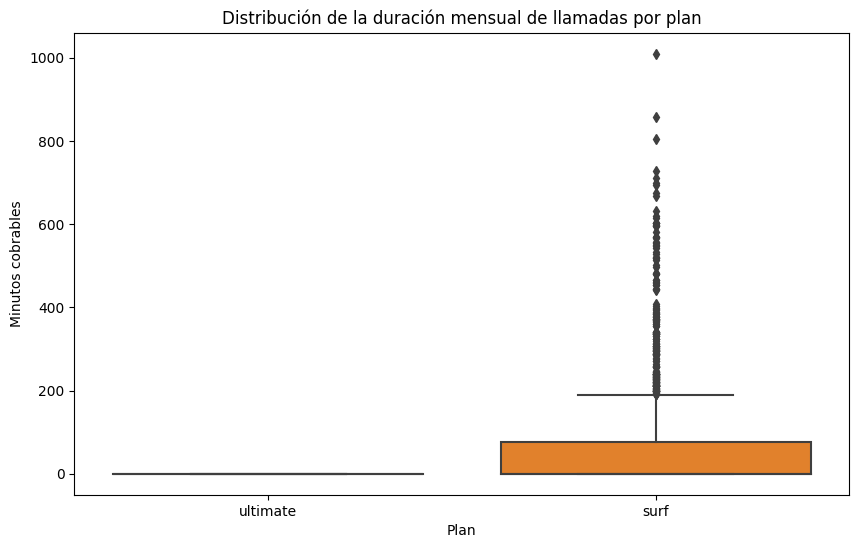

In [144]:
# Trazar un diagrama de caja (boxplot) usando seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='plan_id', y='minutos_cobrables', data=tabla_de_consumo_planes)
plt.title('Distribución de la duración mensual de llamadas por plan')
plt.xlabel('Plan')
plt.ylabel('Minutos cobrables')
plt.show()

In [146]:
conteo_llamadas_plan = tabla_de_consumo_planes['plan_id'].value_counts()
conteo_llamadas_plan

surf        1579
ultimate     724
Name: plan_id, dtype: int64

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

**El comportamiento de los usuarios es muy diferente en cada plan, ya que en el plan ultimate los usuarios realizan muy pocas llamadas 724. En cuanto al plan surf, los usuarios gastan mas llamadas y tiene  una distribución más dispersa ya que la mayoría de los usuarios se encuentran en la parte inferior del gráfico (cerca de los 0 a 300 minutos), hay algunos que hacen muchas más llamadas, como indican los outliers que llegan hasta más de 1000 minutos.**

### Mensajes

In [92]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

def mensajes_por_cobrar(row):
    plan = row['plan_id']
    number_of_texts = row['numero_de_mensajes']
    
    mensajes_cobrables = 0
    
    if plan == 'surf':
        if number_of_texts > surf_monthly_messages:
            mensajes_cobrables = number_of_texts - surf_monthly_messages 
    elif plan == 'ultimate':
        
        if number_of_texts > ultimate_monthly_messages:
            mensajes_cobrables = number_of_texts - ultimate_monthly_messages
            
    return mensajes_cobrables

In [93]:
tabla_de_consumo_planes['mensajes_cobrables'] = tabla_de_consumo_planes.apply(mensajes_por_cobrar, axis = 1)

In [94]:
tabla_de_consumo_planes

,user_id,month,minutos_usados,llamadas_hechas,numero_de_mensajes,total_de_datos_usados,total_de_datos_usados_redondeado,plan_id,city,minutos_cobrables,mensajes_cobrables
0,1000,12.0,124.0,16.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0,0.0
1,1001,8.0,182.0,27.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0
2,1001,9.0,315.0,49.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0
3,1001,10.0,393.0,65.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,3.0
4,1001,11.0,426.0,64.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Boston-Cambridge-Newton, MA-NH MSA",0.0,0.0
2299,1319,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Colorado Springs, CO MSA",0.0,0.0
2300,1378,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Denver-Aurora-Lakewood, CO MSA",0.0,0.0
2301,1463,NaN,NaN,NaN,NaN,NaN,NaN,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0,0.0


In [95]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

len(tabla_de_consumo_planes.query('mensajes_cobrables > 0'))/len(tabla_de_consumo_planes)

0.14763352149370387

In [96]:
## *Al 14% de los clientes, les voy a cobrar por los mensajes 

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

### Internet

In [97]:
def datos_cobrables (fila):
    plan = fila['plan_id']
    datos_usados = fila['total_de_datos_usados_redondeado']
    
    datos_cobrables = 0
    
    if plan == 'surf':
        if datos_usados > surf_monthly_data:
            datos_cobrables = datos_usados - surf_monthly_data
    elif plan == 'ultimate':
        
        if datos_usados > ultimate_monthly_data:
            datos_cobrables = datos_usados - ultimate_monthly_data
        
    return datos_cobrables

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

In [98]:
tabla_de_consumo_planes['datos_cobrables'] = tabla_de_consumo_planes.apply(datos_cobrables, axis =1)

In [99]:
tabla_de_consumo_planes

,user_id,month,minutos_usados,llamadas_hechas,numero_de_mensajes,total_de_datos_usados,total_de_datos_usados_redondeado,plan_id,city,minutos_cobrables,mensajes_cobrables,datos_cobrables
0,1000,12.0,124.0,16.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0,0.0,0.0
1,1001,8.0,182.0,27.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.0
2,1001,9.0,315.0,49.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.0
3,1001,10.0,393.0,65.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,3.0,7.0
4,1001,11.0,426.0,64.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Boston-Cambridge-Newton, MA-NH MSA",0.0,0.0,0.0
2299,1319,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Colorado Springs, CO MSA",0.0,0.0,0.0
2300,1378,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Denver-Aurora-Lakewood, CO MSA",0.0,0.0,0.0
2301,1463,NaN,NaN,NaN,NaN,NaN,NaN,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0,0.0,0.0


In [100]:
len(tabla_de_consumo_planes.query('datos_cobrables > 0'))/len(tabla_de_consumo_planes)

0.4133738601823708

In [101]:
##** El 41% de los clientes consumen más datos de lo que incluye el plan

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [102]:
def rentabilidad_mensual(fila):
    plan = fila['plan_id']
    llamadas_cobrables = fila['minutos_cobrables']
    mensajes_cobrables = fila['mensajes_cobrables']
    datos_cobrables = fila['datos_cobrables']
    
    rentabilidad = 0
    
    if plan == 'surf':
        rentabilidad = surf_monthly_charge + (llamadas_cobrables * surf_call_charge) + (mensajes_cobrables * surf_message_charge) + (datos_cobrables * surf_data_charge)
    elif plan == 'ultimate':
        rentabilidad = ultimate_monthly_charge + (llamadas_cobrables * ultimate_call_charge) + (mensajes_cobrables * ultimate_message_charge) + (datos_cobrables * ultimate_data_charge)
        
    return rentabilidad

In [103]:
tabla_de_consumo_planes['rentabilidad_mensual'] = tabla_de_consumo_planes.apply(rentabilidad_mensual, axis=1)

In [104]:
tabla_de_consumo_planes

,user_id,month,minutos_usados,llamadas_hechas,numero_de_mensajes,total_de_datos_usados,total_de_datos_usados_redondeado,plan_id,city,minutos_cobrables,mensajes_cobrables,datos_cobrables,rentabilidad_mensual
0,1000,12.0,124.0,16.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0,0.0,0.0,70.00
1,1001,8.0,182.0,27.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.0,20.00
2,1001,9.0,315.0,49.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.0,20.00
3,1001,10.0,393.0,65.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,3.0,7.0,90.09
4,1001,11.0,426.0,64.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,4.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Boston-Cambridge-Newton, MA-NH MSA",0.0,0.0,0.0,20.00
2299,1319,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Colorado Springs, CO MSA",0.0,0.0,0.0,20.00
2300,1378,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Denver-Aurora-Lakewood, CO MSA",0.0,0.0,0.0,20.00
2301,1463,NaN,NaN,NaN,NaN,NaN,NaN,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0,0.0,0.0,70.00


In [105]:
variables = ['minutos_usados', 'numero_de_mensajes', 'total_de_datos_usados_redondeado']

In [106]:
plans = ['surf', 'ultimate']

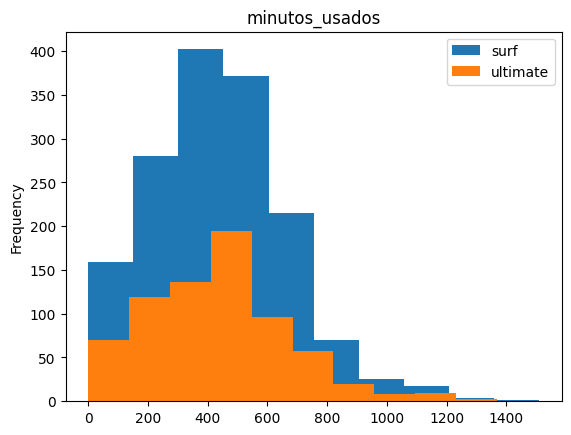

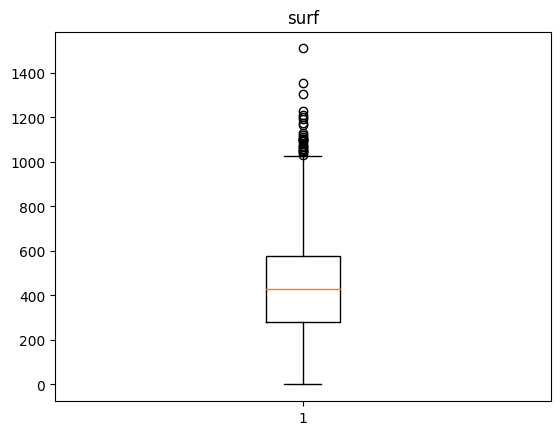

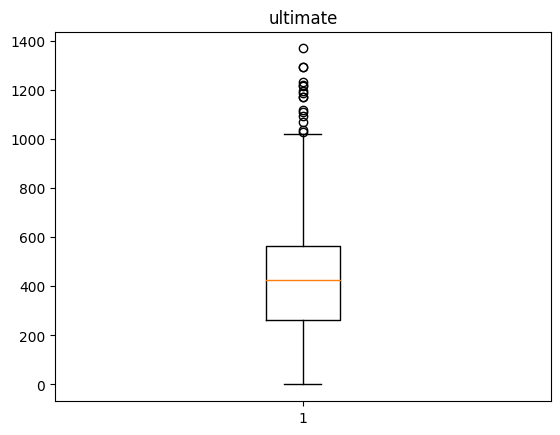

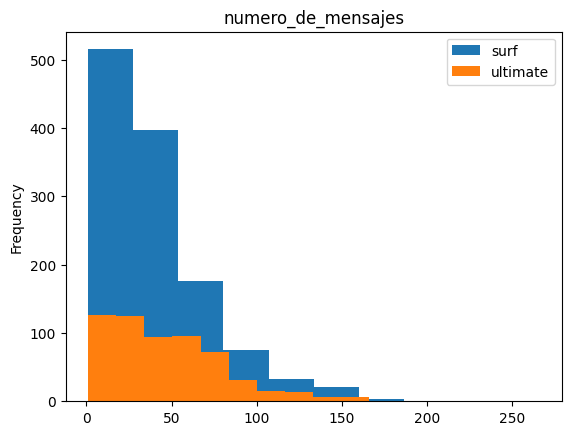

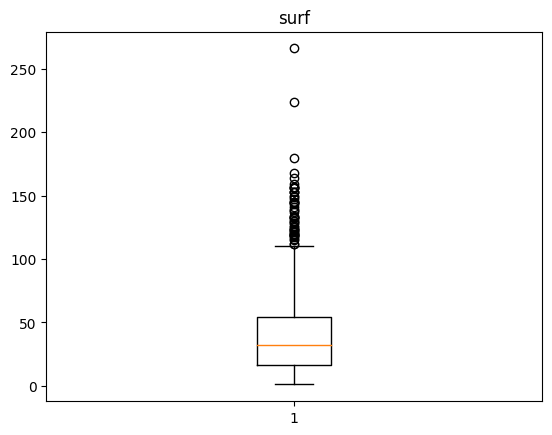

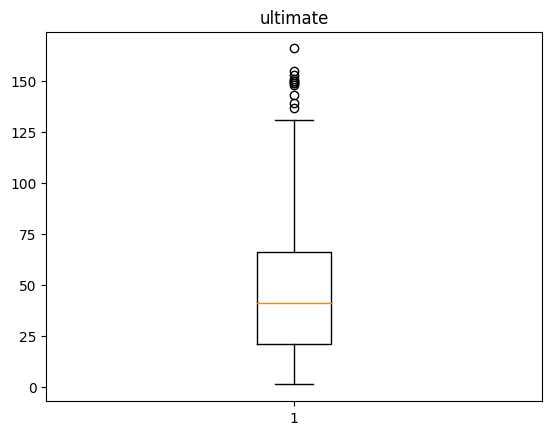

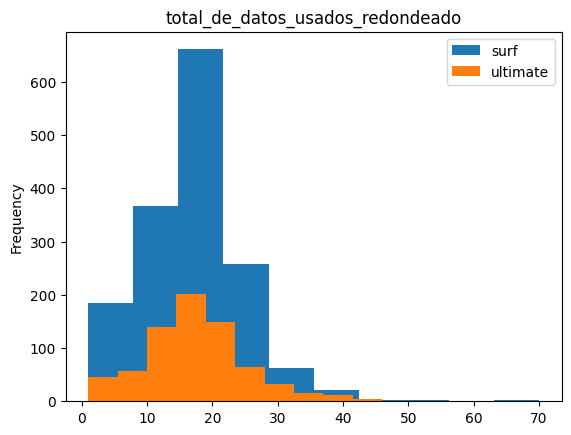

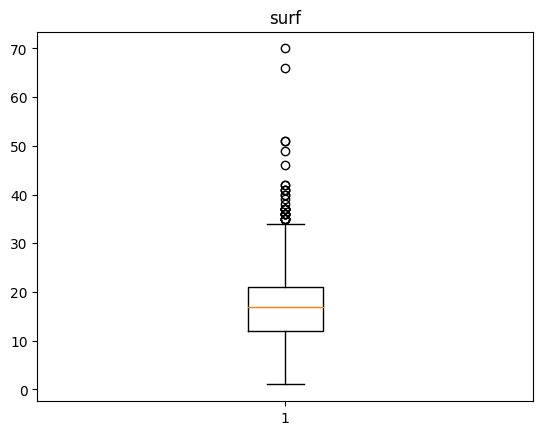

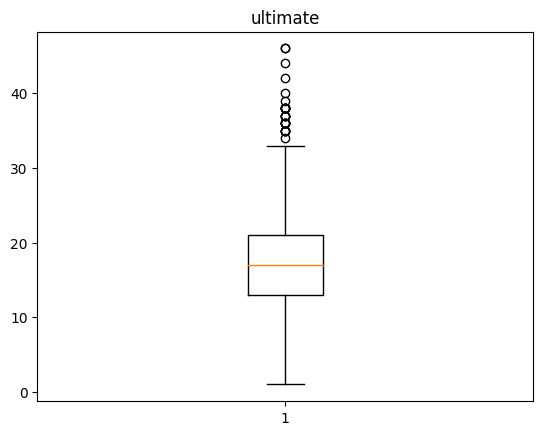

In [107]:
import matplotlib.pyplot as plt

for metrica in variables:
    for plan in plans:
        tabla_de_consumo_planes[tabla_de_consumo_planes['plan_id'] == plan][metrica].plot(kind='hist')
    plt.title(metrica)
    plt.legend(plans)
    plt.show()
      
    for plan in plans:    
        plt.boxplot(tabla_de_consumo_planes[tabla_de_consumo_planes['plan_id'] == plan][metrica].dropna())  
        plt.title(plan)
        plt.show()
    

In [133]:
##**En la grafica minutos_usados:
    #En el plan surf: la mayoria de los usuarios tienden a usr entre 200 y 600 minutos al mes, con un pico entre 250 y 500 minutos
    #En el plan ultimate: Los usuarios tienen una distribución más concentrada en un rango más bajo de minutos usados, con un pico entre 300 y 400 minutos.
        
##**En la gráfica numero_de_mensajes:
    #En el plan surf: La mayoría de los usuarios del plan Surf envían menos de 50 mensajes al mes. El pico de frecuencia se encuentra en el primer intervalo (0 a 25 mensajes). 
         #Ademas, a medida que aumenta el número de mensajes enviados, la frecuencia de usuarios disminuye drásticamente. Muy pocos usuarios envían más de 100 mensajes, y casi ninguno supera los 200.
    
    #En el plan ultimate: la mayoría de los usuarios del plan Ultimate también envían menos de 50 mensajes al mes.
    
##**En la gráfica total_de_datos_usados_redondeados: 
    #La mayoría de los usuarios del plan Surf consumen entre 10 y 20 GB de datos al mes, con un pico de frecuencia alrededor de 15 a 20 GB. La frecuencia de usuarios disminuye significativamente después de los 20 GB de datos usados, con muy pocos usuarios que consumen más de 30 GB.
    #Los usuarios del plan Ultimate también tienen una concentración de consumo de datos similar, con la mayoría utilizando entre 10 y 20 GB.

In [112]:
#Para obtener la rentabilidad de cada uno de los planes:

plans = ['surf', 'ultimate']

for plan in plans:
    rentabilidad = tabla_de_consumo_planes[tabla_de_consumo_planes['plan_id'] == plan]['rentabilidad_mensual'].sum()
    print(f'La rentabilidad mensual del plan {plan} es de : {rentabilidad}')

La rentabilidad mensual del plan surf es de : 95611.18
La rentabilidad mensual del plan ultimate es de : 52346.0


In [122]:
#Para obtener la rentabilidad promedio mensual de cada uno de los planes:

plans = ['surf', 'ultimate']

for plan in plans:
    rentabilidad_promedio_mensual = tabla_de_consumo_planes[tabla_de_consumo_planes['plan_id'] == plan]['rentabilidad_mensual'].mean()
    print(f'La rentabilidad mensual promedio del plan {plan} es de : {rentabilidad_promedio_mensual}')

La rentabilidad mensual promedio del plan surf es de : 60.551728942368584
La rentabilidad mensual promedio del plan ultimate es de : 72.3011049723757


In [118]:
#Ganancia del plan 'surf'

alpha = 0.05

sample_1 = tabla_de_consumo_planes.query('plan_id == "surf"')['rentabilidad_mensual']

In [119]:
sample_1

1       20.00
2       20.00
3       90.09
4       60.00
5       60.00
        ...  
2295    20.00
2298    20.00
2299    20.00
2300    20.00
2302    20.00
Name: rentabilidad_mensual, Length: 1579, dtype: float64

In [120]:
#Ganancia del plan 'ultimate'

alpha = 0.05

sample_2 = tabla_de_consumo_planes.query('plan_id == "ultimate"')['rentabilidad_mensual']

In [121]:
sample_2

0       70.0
19      70.0
20      84.0
26      70.0
27      70.0
        ... 
2292    70.0
2293    70.0
2296    70.0
2297    70.0
2301    70.0
Name: rentabilidad_mensual, Length: 724, dtype: float64

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

**Es interesante observar que en primer lugar al analizar la rentabilidad total de los dos planes, el plan 'surf' tiene un ingreso mayor con 9.5611 en comparacion con el plan 'ultimate' con 52.346. Sin embargo al realizar operaciones estadisticas, nos damos cuenta que en promedio mensualmente, el plan 'ultimate' tiene un ingreso mayor que el otro plan.**

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [129]:
# Prueba las hipótesis: 

# H0= Los promedios mensuales del plan surf son iguales al plan ultimate
# H1= Los promedios mensuales del plan Surf no son iguales al plan Ultimate
#prueba estadistica = st.ttest

In [124]:
from scipy import stats as st

resultados = st.ttest_ind(sample_1, sample_2, equal_var=False)

print(f'p-value: {resultados.pvalue}')

p-value: 1.218411585212325e-15


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [130]:
# Prueba las hipótesis

if resultados.pvalue < alpha:
    print("Podemos rechazar la hipotesis nula")
else:
    print("No podemos rechazar la hipotesis nula")


Podemos rechazar la hipotesis nula


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

**Como analista para el operador de telecomunicaciones Megaline, en el análisis de los datos de los planes 'surf' y 'ultimate' se pudo determinar que cada plan tiene un comportamiento de consumo diferente, es decir en el plan surf los usuarios consumen más minutos que el plan ultimate, sin embargo el plan ultimate consume mas llamadas, mensajes y datos que el plan surf. En cuanto a ingresos, pudimos comprender que solamente con el calculo del total de los ingresos no podemos generar conclusiones del ingreso mas alto ya que al realizar los analisis estadisticos se identifico que en promedio el plan ultimate tiene mayores ingresos para la compañia, lo cual se ve reflejado en los valores de llamadas, mensajes y datos. Por ultimo con la hipotesis llegamos a la conclusión que los planes son diferentes y se recomienda a la gerencia realizar estrategias de ventas por separado a cada plan.**